<a href="https://colab.research.google.com/github/kiakass/machine-learning/blob/main/gradient_descent_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

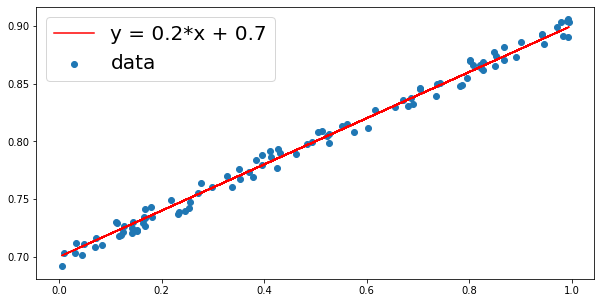

w: 0.2, b: 0.7


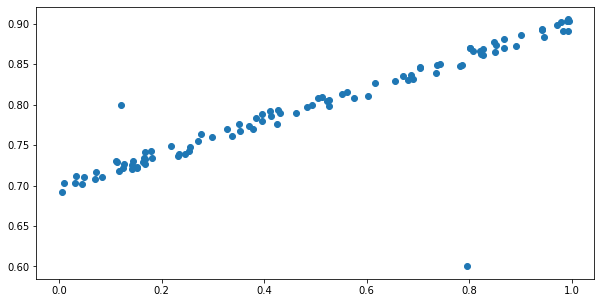

In [30]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

# data 생성 y = wx + b + noise
x, y = make_linear(w=0.2, b=0.7, size=100, noise=0.01)

# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5] = 0.6
y[10] = 0.8

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

 0 w = -0.53173, b = 0.60003 error = 1.67493
step: 0 W: -0.5317323938117855 b: 0.6000338326957514 cost: 1.6749298161876691


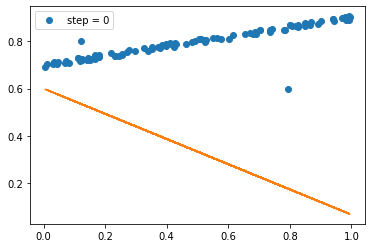

20 w = -0.05195, b = 0.83013 error = 0.00692
step: 20 W: -0.05195188312950748 b: 0.8301297355376566 cost: 0.006922888499357131


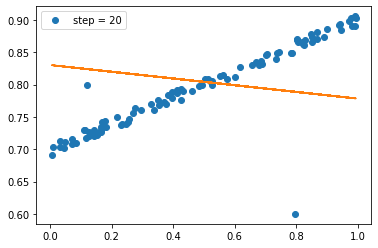

40 w = 0.07876, b = 0.76152 error = 0.00208
step: 40 W: 0.0787567686023 b: 0.7615234516343252 cost: 0.0020820538230050113


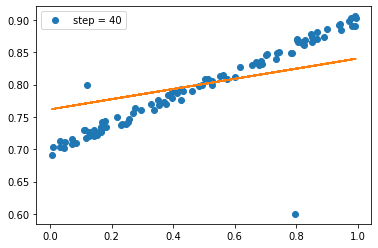

60 w = 0.13946, b = 0.72966 error = 0.00104
step: 60 W: 0.13945619565909734 b: 0.7296635697662969 cost: 0.0010381012520225225


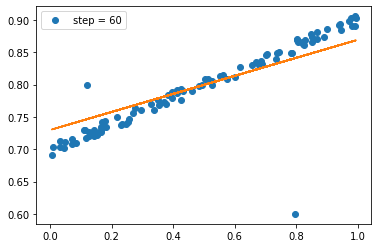

80 w = 0.16764, b = 0.71487 error = 0.00081
step: 80 W: 0.16764423379650728 b: 0.7148682478218407 cost: 0.0008129671494709745


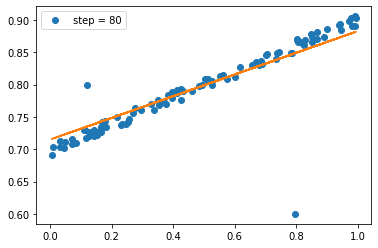

------------------------------------------------------------
final result : 84 w = 0.17, b = 0.71 cost = 0.00080


In [33]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.5
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    
    #hypothesis
    y_hat = x * w + b

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    #loss : Mean square error
    error = ((y_hat - y)**2).mean()

    if error < 0.0008:
        break

    errors.append(error)
    
    #그래프출력
    if epoch % 20 == 0: # step 마다 그래프 출력
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
        print('step:',epoch, 'W:',w,'b:', b,'cost:',error)
        plt.plot(x,y,'o', label='step = {}'.format(epoch))
        plt.plot(x,w*x+b)
        plt.legend()
        plt.show()

print("----" * 15)
print("final result : {0:2} w = {1:.2f}, b = {2:.2f} cost = {3:.5f}".format(epoch, w, b, error))